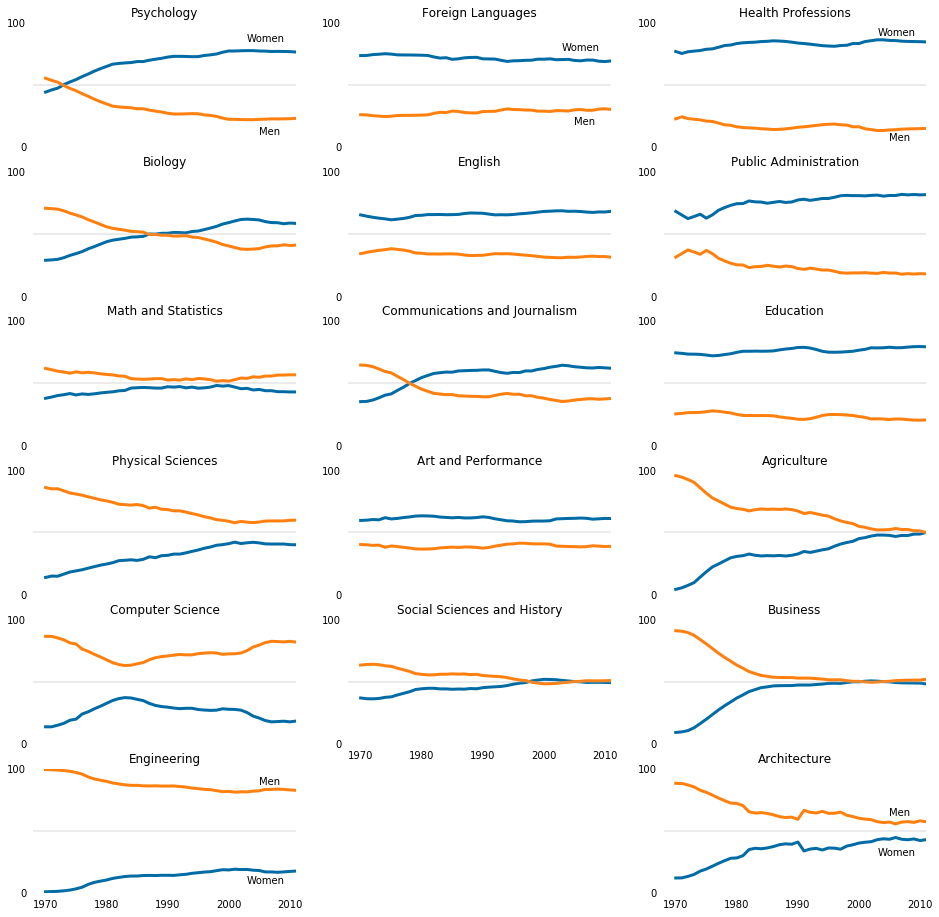

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering', 'Computer Science']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
cats = [stem_cats, lib_arts_cats, other_cats]
plot_types = ['stem_majors_plots', 'lib_arts_majors', 'other_majors']
r = {'stem_majors_plots': (0,16,3), 'lib_arts_majors': (1,14,3), 'other_majors': (2,19,3)}

fig = plt.figure(figsize=(16, 16))

for plot_type_index, plot_type in enumerate(plot_types):

    start = r.get(plot_type)[0]
    end = r.get(plot_type)[1]
    period = r.get(plot_type)[2]

    for index, sp in enumerate(range(start,end,period)):
        ax = fig.add_subplot(6,3,sp+1)
        ax.plot(women_degrees['Year'], women_degrees[cats[plot_type_index][index]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cats[plot_type_index][index]], c=cb_orange, label='Men', linewidth=3)
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        for key,spine in ax.spines.items():
            spine.set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(cats[plot_type_index][index])
        ax.set_yticks([0,100])
        
        if (index < 5 and plot_type_index != 1) or (index < 4 and plot_type_index == 1):
            ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
        else:
            ax.tick_params(bottom="off", top="off", left="off", right="off")
        
        # Formats the stem majors plots to the figure object
        if plot_type_index == 0:    
            if index == 0:
                ax.text(2005, 10, "Men")
                ax.text(2003, 85, "Women")
            elif index == 5:
                ax.text(2005, 87, "Men")
                ax.text(2003, 7, "Women")
        
        # Formats the lib_arts majors plots to the figure object        
        elif plot_type_index == 1:
            if index == 0:
                ax.text(2005, 18, "Men")
                ax.text(2003, 78, "Women")
        
        # Formats the other majors plots to the figure object    
        elif plot_type_index == 2:
            if index == 0:
                ax.text(2005, 5, "Men")
                ax.text(2003, 90, "Women")
            elif index == 5:
                ax.text(2005, 62, "Men")
                ax.text(2003, 30, "Women")

plt.savefig('gender_degrees.png')
plt.show()